# **Public Dataset**

**Empirical Mode Decomposition**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


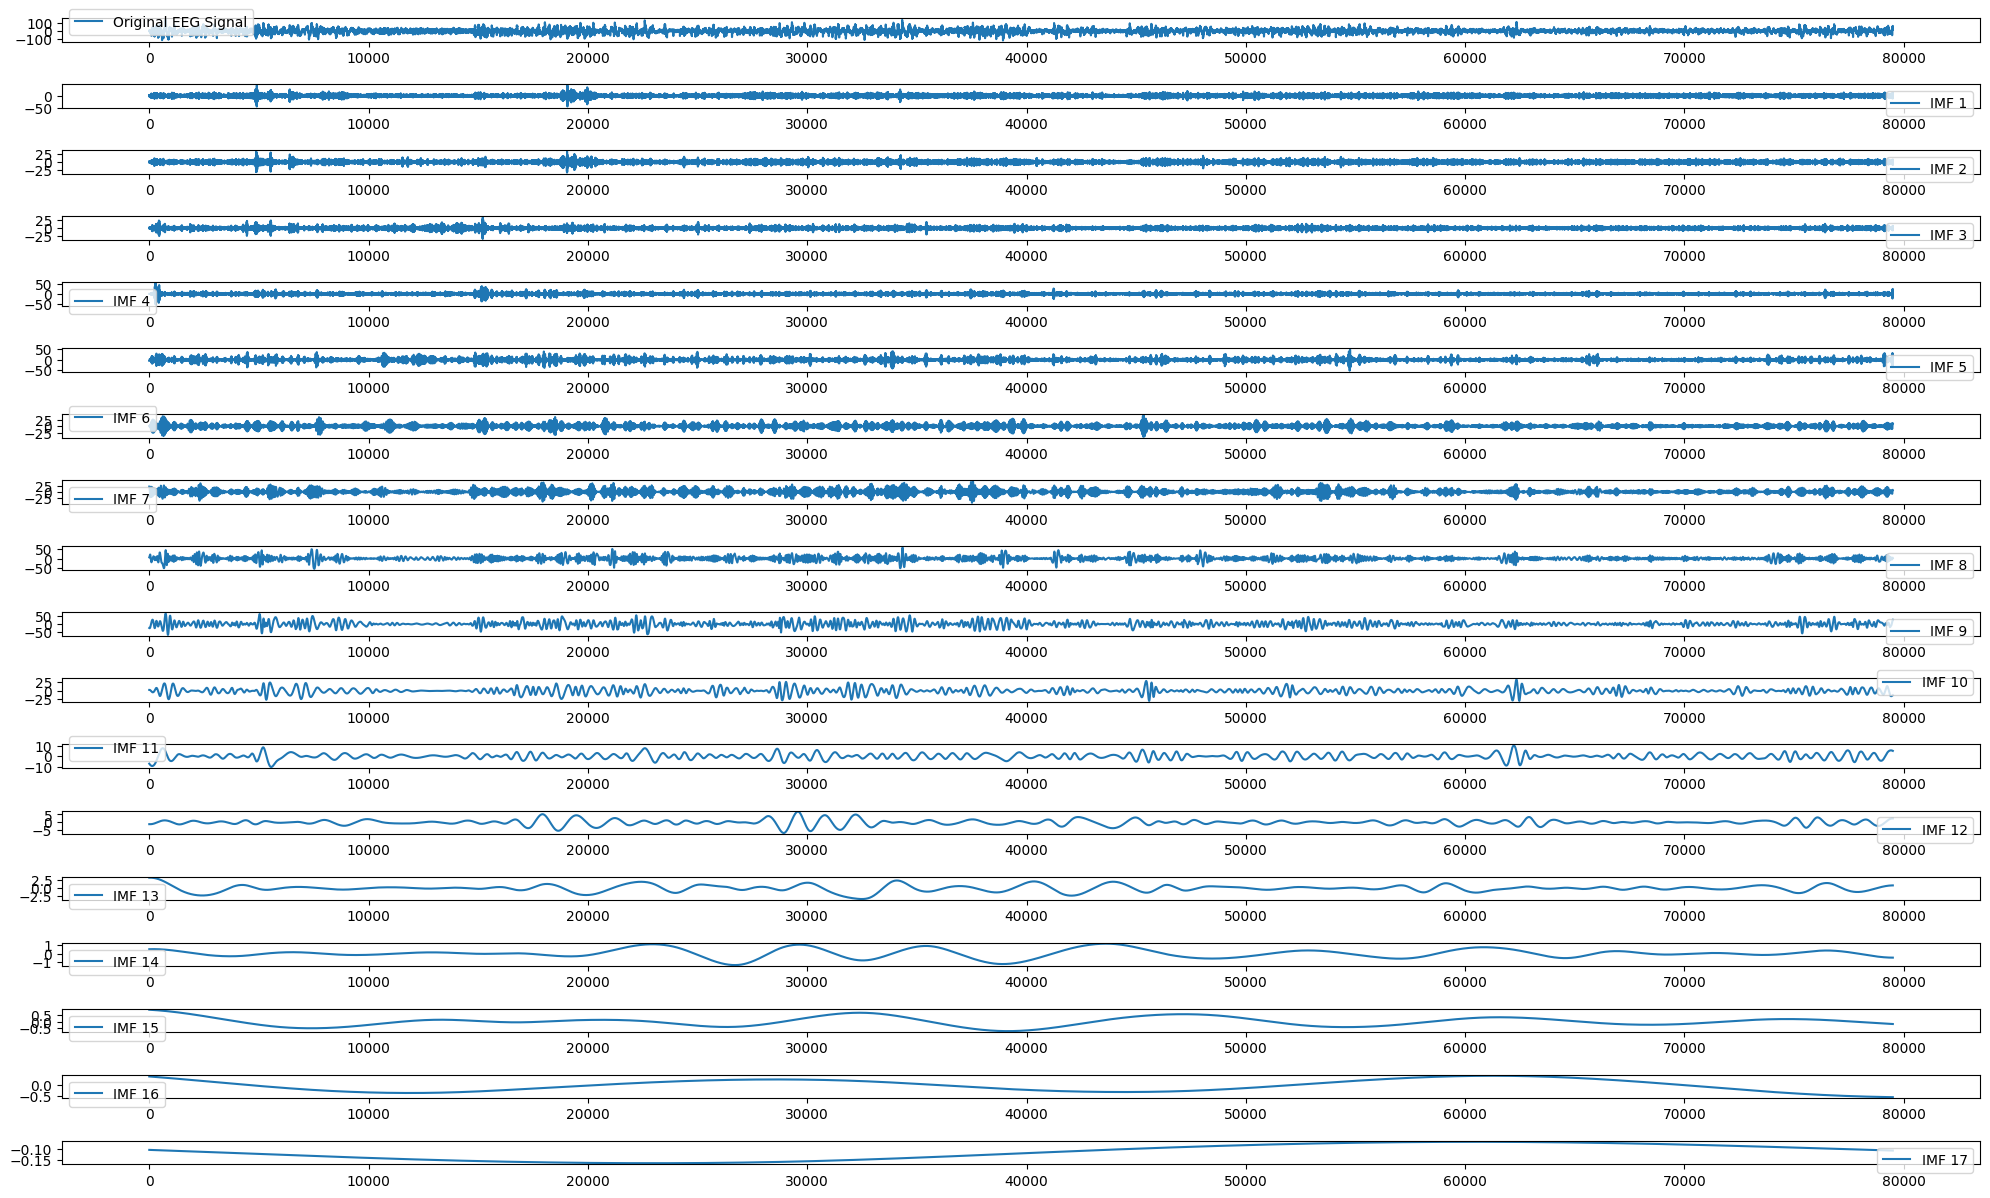

In [ ]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/Mini Project/output.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

# Assuming the EEG data is in the first column of the CSV file
# If your data has multiple columns, adjust the indexing accordingly
eeg_signal = eeg_data[:, 0]

# Define the EMD function
def perform_emd(signal):
    emd = EMD()
    imfs = emd(signal)
    return imfs

# Apply EMD to the EEG signal
imfs = perform_emd(eeg_signal)

# Plot the original EEG signal and its IMFs
plt.figure(figsize=(20, 12))
plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(eeg_signal, label='Original EEG Signal')
plt.legend()

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(imf, label=f'IMF {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()

**Fourier Decomposition**

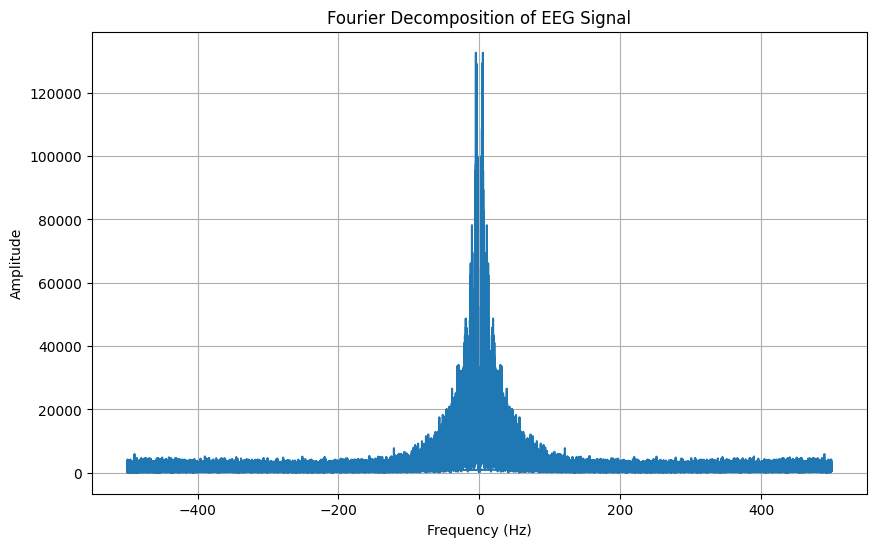

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/Mini Project/output.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

# Assuming the EEG data is in the first column of the CSV file
# If your data has multiple columns, adjust the indexing accordingly
eeg_signal = eeg_data[:, 0]

# Perform Fourier Decomposition using FFT
sampling_rate = 1000  # Replace with the actual sampling rate of your EEG data
fft_result = np.fft.fft(eeg_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Decomposition of EEG Signal')
plt.grid(True)
plt.show()

**Wavelet Packet Decomposition**

In [ ]:
pip install PyWavelets

IndexError: Path length is out of range.

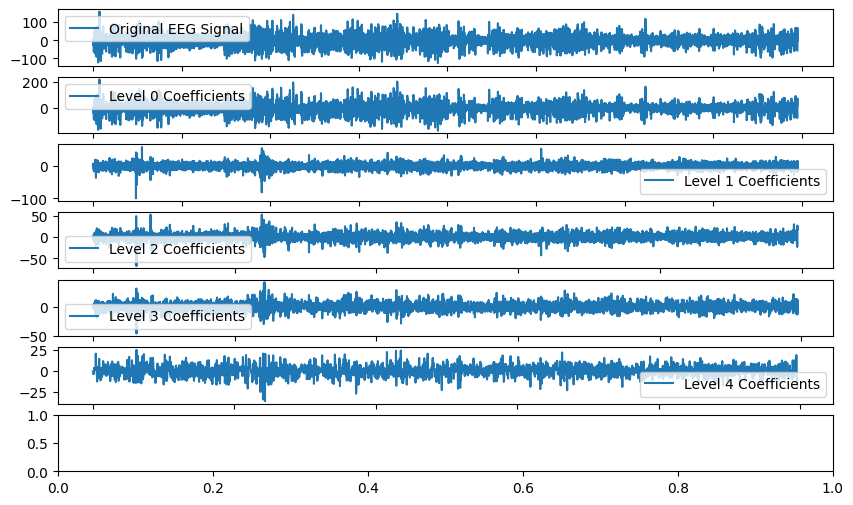

In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/Mini Project/output.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

# Assuming the EEG data is in the first column of the CSV file
# If your data has multiple columns, adjust the indexing accordingly
eeg_signal = eeg_data[:, 0]

# Define the wavelet and the decomposition level
wavelet = 'db4'  # Choose a wavelet from the PyWavelets library
level = 5  # Adjust the decomposition level based on your needs

# Perform Wavelet Packet Decomposition
wp = pywt.WaveletPacket(data=eeg_signal, wavelet=wavelet, mode='symmetric', maxlevel=level)

# Plot the original signal and its wavelet packet coefficients
plt.figure(figsize=(10, 6))

plt.subplot(level + 2, 1, 1)
plt.plot(eeg_signal, label='Original EEG Signal')
plt.legend()

for i in range(level + 1):
    node_name = 'a' + 'd' * i  # Access the approximation and detail coefficients
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(wp[node_name].data, label=f'Level {i} Coefficients')
    plt.legend()

plt.tight_layout()
plt.show()

# **Original Files**

**Empirical Mode Decomposition**

In [ ]:
import pandas as pd
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)
eeg_data_df.head()

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8
0,3510.82,-19524.9,-12057.7,2857.22,-5799.89,-22912.8,-28692.3,-21716.8
1,12525.20,-80326.0,-49601.4,11735.00,-23878.20,-95010.1,-118012.0,-89347.5
2,13875.30,-139245.0,-85957.8,20276.90,-41432.00,-167499.0,-204466.0,-154869.0
3,-1293.07,-145134.0,-89528.5,21034.60,-43204.90,-179783.0,-212861.0,-161334.0
4,-12496.30,-126370.0,-77898.9,18296.10,-37554.10,-159730.0,-184988.0,-140340.0


In [ ]:
eeg_data_df.shape

(49999, 8)

In [ ]:
eeg_data_df.tail()

,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8
49994,8428.64,1031.860,-149.275,178.4540,-77.64830,3658.81,1435.55,-4233.78
49995,9905.13,1089.560,-191.179,217.1220,5.73756,8738.83,1477.23,-4194.90
49996,-1438.05,857.443,-216.974,-56.1381,-292.97600,1734.56,1259.80,-4405.87
49997,-10198.60,660.519,-187.123,-259.4230,-558.17100,-7734.84,1230.02,-4579.29
49998,-4606.93,775.441,-141.668,-109.3540,-423.02400,-6773.26,1635.04,-4481.45


**Empirical Mode Decomposition**

In [ ]:
pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


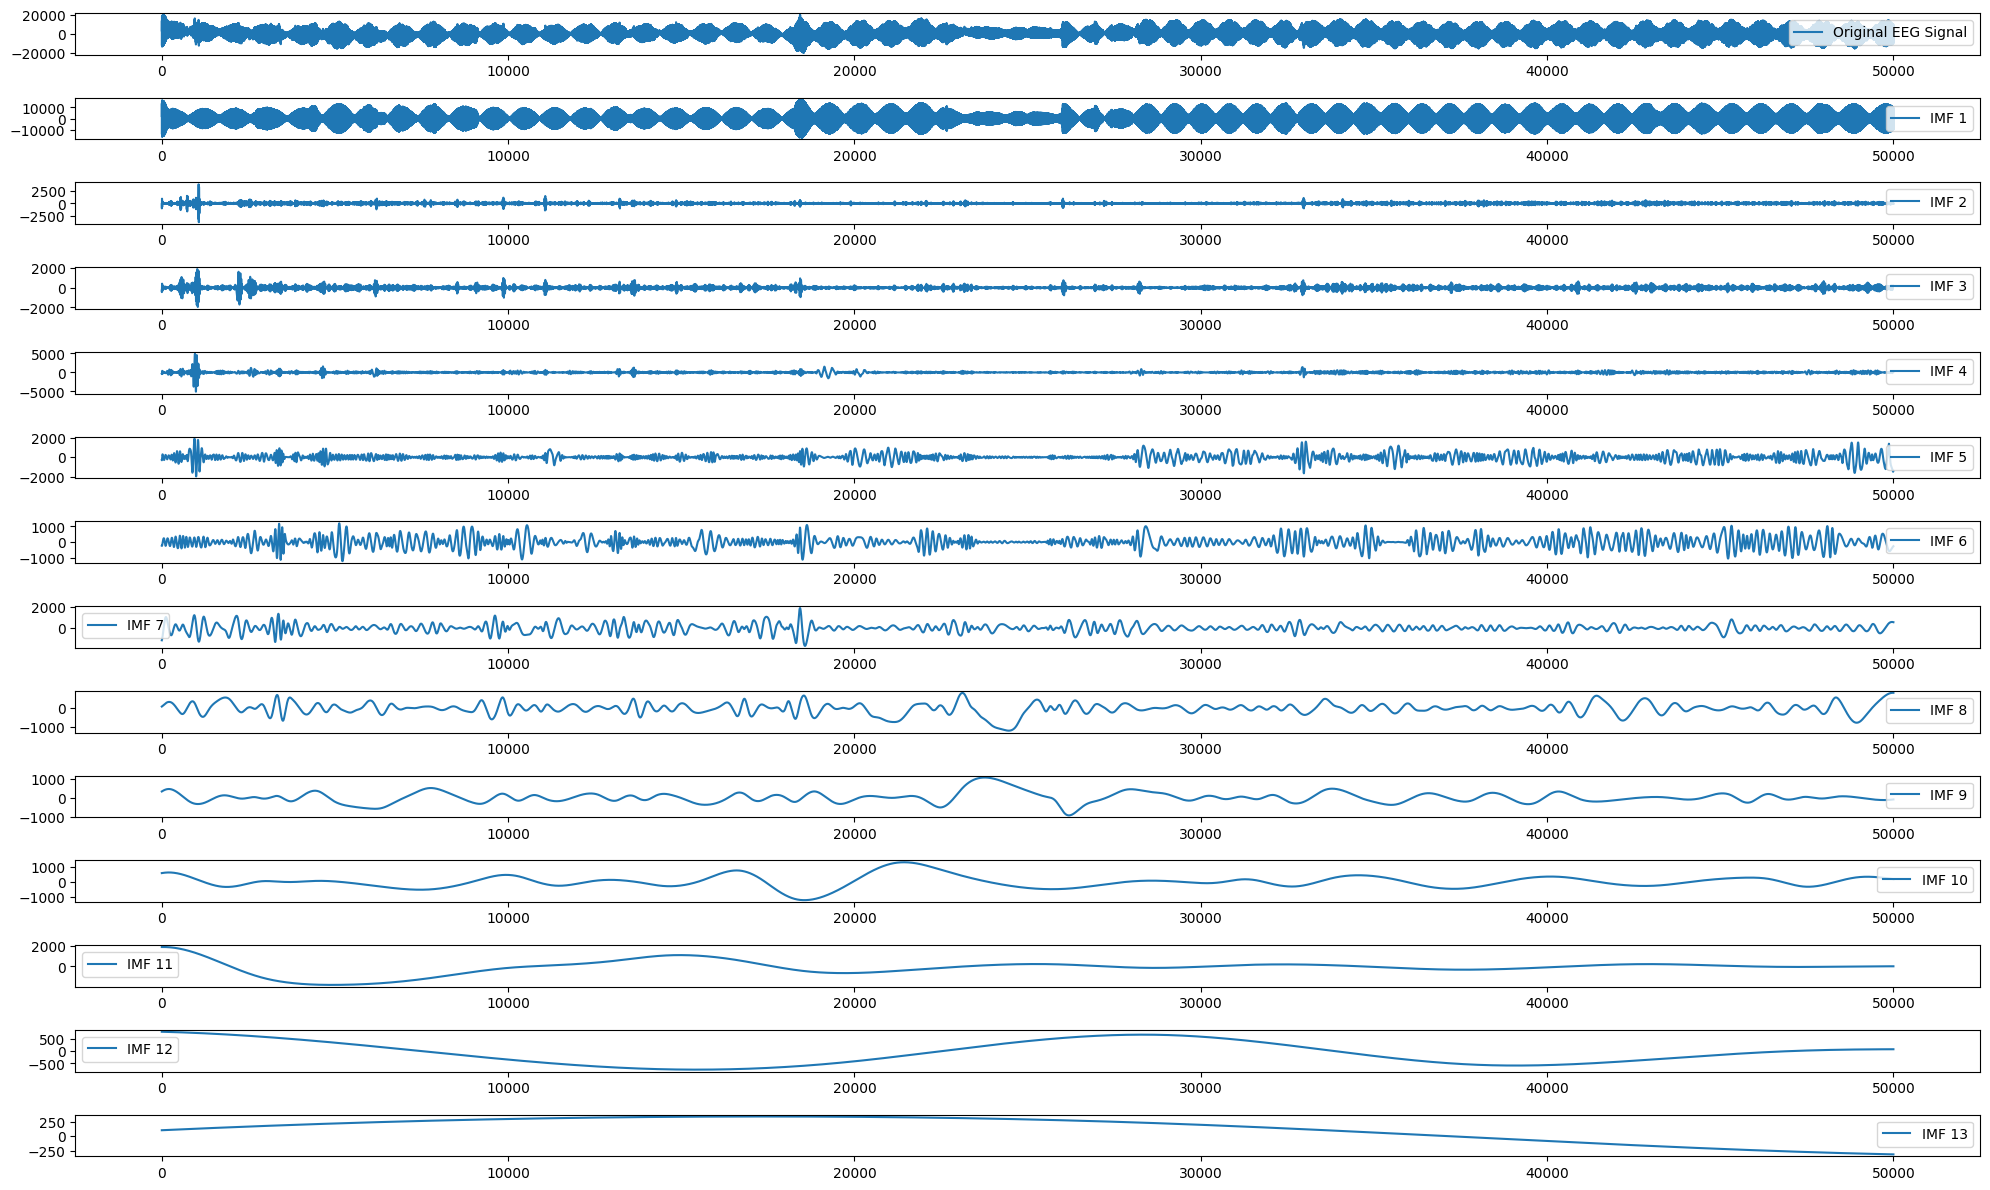

In [ ]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

eeg_signal = eeg_data[:, 0]

# Define the EMD function
def perform_emd(signal):
    emd = EMD()
    imfs = emd(signal)
    return imfs

# Apply EMD to the EEG signal
imfs = perform_emd(eeg_signal)

# Plot the original EEG signal and its IMFs
plt.figure(figsize=(20, 12))
plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(eeg_signal, label='Original EEG Signal')
plt.legend()

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(imf, label=f'IMF {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(type(imfs))

<class 'numpy.ndarray'>


In [ ]:
print(type(eeg_signal))

<class 'numpy.ndarray'>


 **Fourier Decomposition**

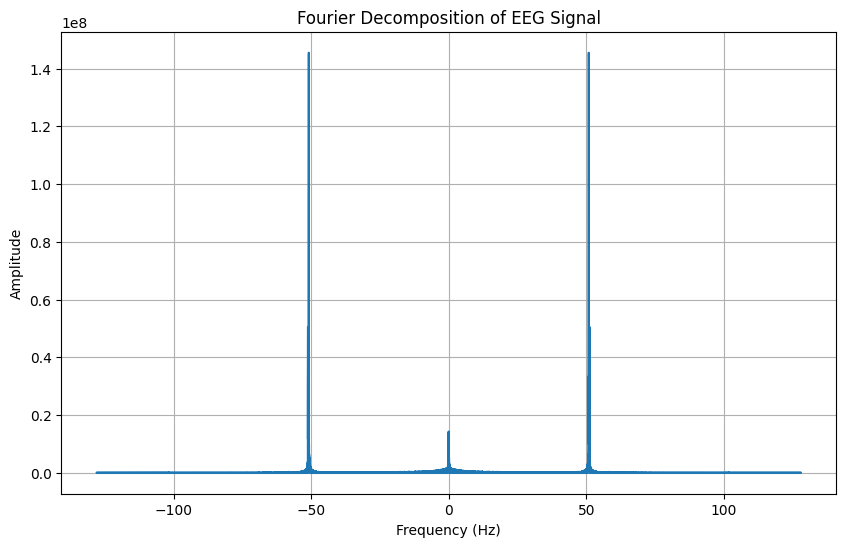

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

eeg_signal = eeg_data[:, 0]

# Perform Fourier Decomposition using FFT
sampling_rate = 256
fft_result = np.fft.fft(eeg_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_result), label="Fourier Decomposed Frequencies")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Decomposition of EEG Signal')
plt.grid(True)
plt.show()

In [ ]:
print(type(fft_result))

<class 'numpy.ndarray'>


In [ ]:
fft_result.shape

(49999,)

**Wavelet Packet Decomposition**

In [ ]:
pip install PyWavelets

IndexError: Path length is out of range.

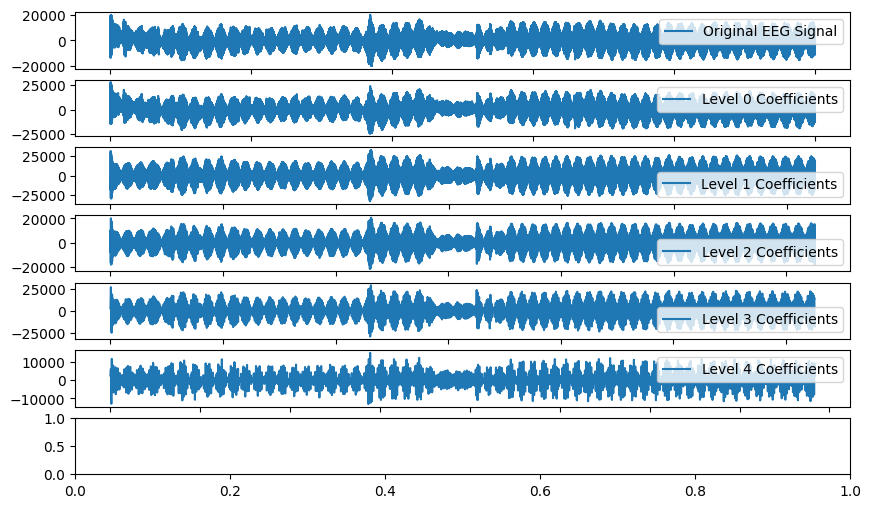

In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

eeg_signal = eeg_data[:, 0]

# Define the wavelet and the decomposition level
wavelet = 'db4'
level = 5

# Perform Wavelet Packet Decomposition
wp = pywt.WaveletPacket(data=eeg_signal, wavelet=wavelet, mode='symmetric', maxlevel=level)

# Plot the original signal and its wavelet packet coefficients
plt.figure(figsize=(10, 6))

plt.subplot(level + 2, 1, 1)
plt.plot(eeg_signal, label='Original EEG Signal')
plt.legend()

for i in range(level + 1):
    node_name = 'a' + 'd' * i  # Access the approximation and detail coefficients
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(wp[node_name].data, label=f'Level {i} Coefficients')
    plt.legend()

plt.tight_layout()
plt.show()

**Time-Frequency Representation**

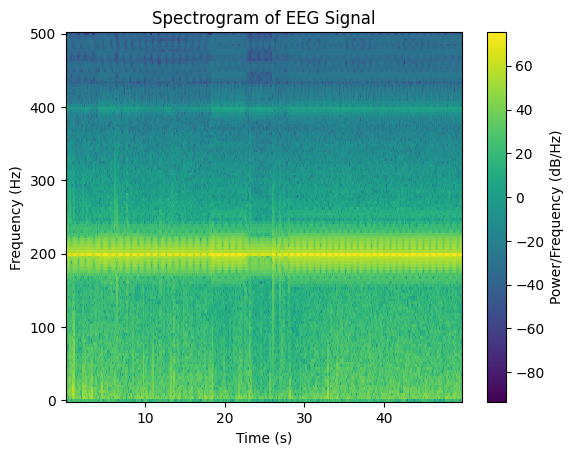

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


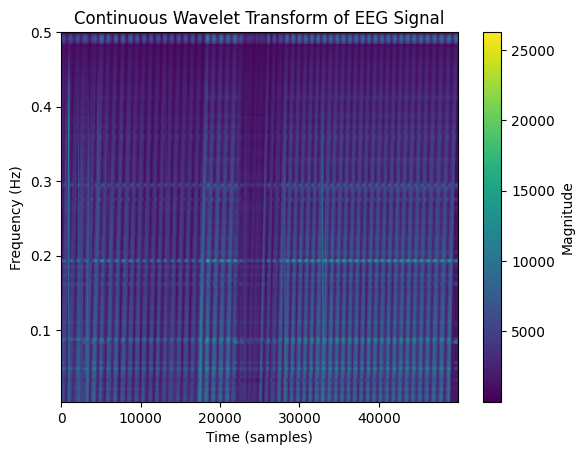

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pywt

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values


eeg_signal = eeg_data[:, 0]

# Define parameters for time-frequency representation
fs = 1000
nperseg = 256
noverlap = 128

# Perform Short-Time Fourier Transform (STFT)
frequencies, times, Sxx = spectrogram(eeg_signal, fs, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of EEG Signal')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

# Perform Continuous Wavelet Transform (CWT)
wavelet = 'cmor'
scales = np.arange(1, 128)

coefficients, frequencies = pywt.cwt(eeg_signal, scales, wavelet)

# Plot the CWT coefficients
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(eeg_signal), min(frequencies), max(frequencies)])
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (samples)')
plt.title('Continuous Wavelet Transform of EEG Signal')
plt.show()

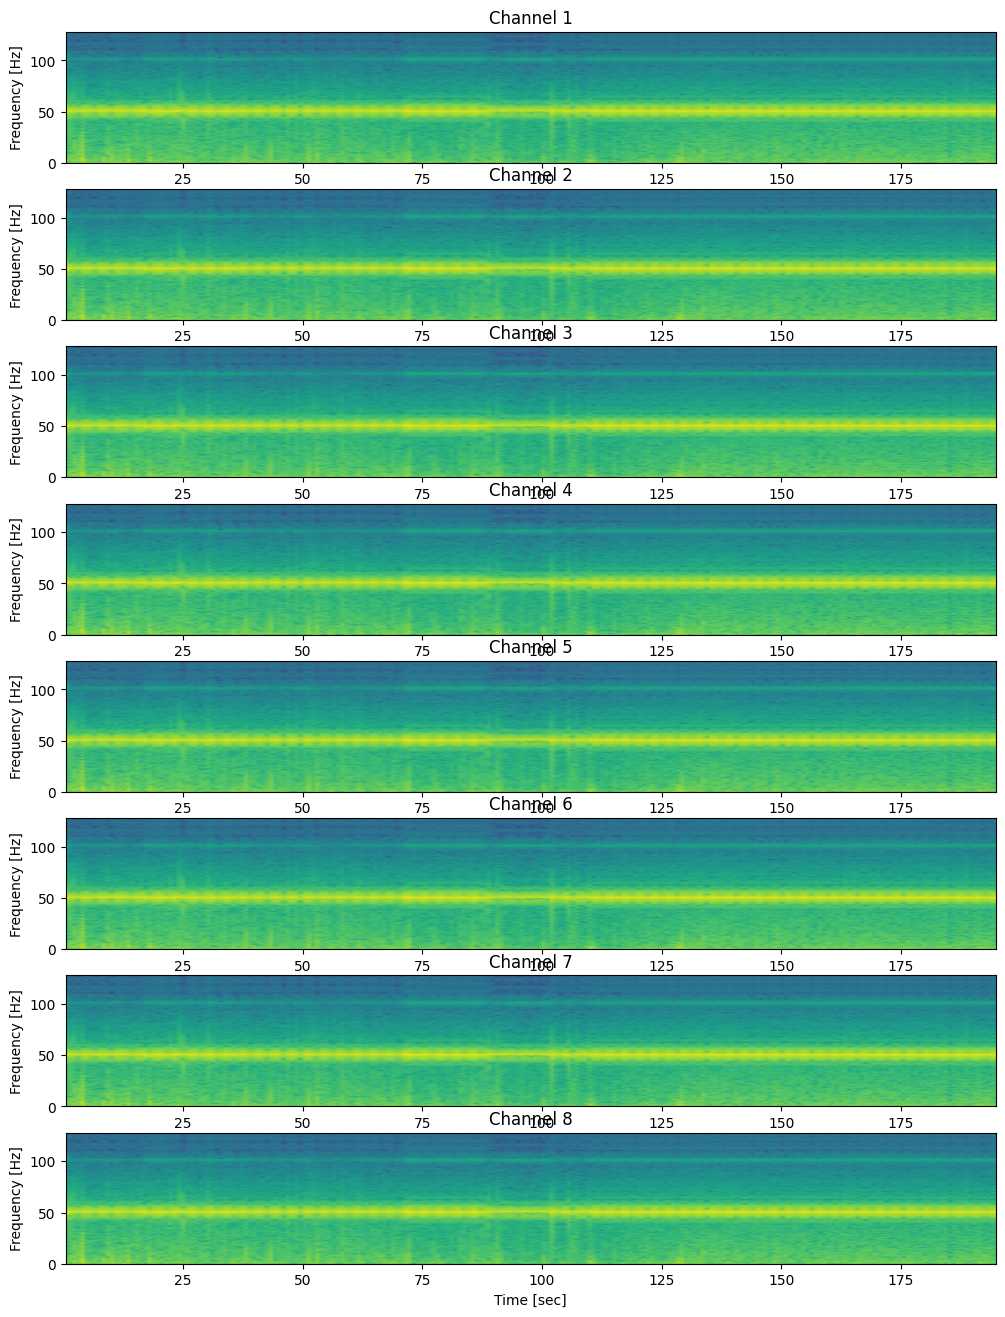

<Figure size 500x1000 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import spectrogram

# Assuming the EEG dataset is loaded in a variable named 'eeg_data'
# and the sampling frequency of the EEG data is known (e.g., 256 Hz)
sampling_frequency = 256  # Hz

# Function to compute and plot the Time-Frequency Representation using Spectrogram
def plot_time_frequency_representation(data, fs):
    fig, axes = plt.subplots(data.shape[1], 1, figsize=(12, 2 * data.shape[1]))
    for i in range(data.shape[1]):
        f, t, Sxx = spectrogram(eeg_data[:, 0], fs)
        axes[i].pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
        axes[i].set_ylabel('Frequency [Hz]')
        axes[i].set_xlabel('Time [sec]')
        axes[i].set_title('Channel ' + str(i+1))
    plt.figure(figsize=(5, 10))
    plt.tight_layout()
    plt.show()

# Plot the Time-Frequency Representation for the EEG dataset
plot_time_frequency_representation(eeg_data, sampling_frequency)

**ESR**

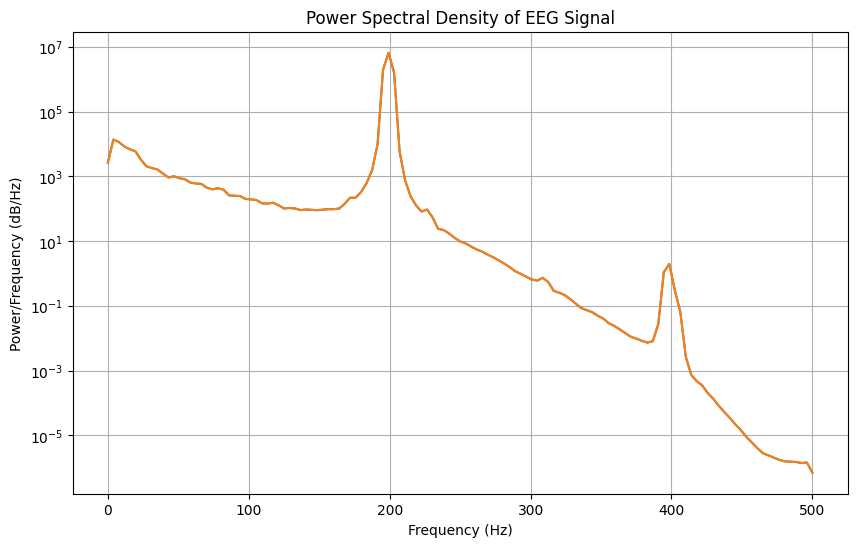

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

eeg_signal = eeg_data[:, 0]

# Define parameters for spectral analysis
fs = 1000
nperseg = 256

# Perform FFT and compute power spectral density (PSD)
frequencies, psd = welch(eeg_signal, fs, nperseg=nperseg)

freq_wp, psd_wp = welch(wp.reconstruct(update=False), fs, nperseg=nperseg)

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.semilogy(freq_wp, psd_wp)
plt.title('Power Spectral Density of EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

**Cross Correlation Coefficient for original data and Wavelet decomposed data**

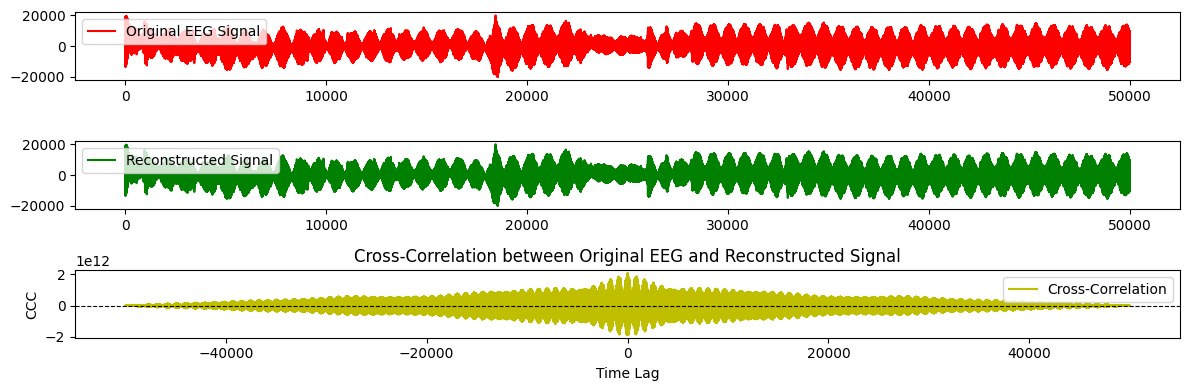

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Assuming you have the original EEG signal and wp (Wavelet Packet decomposition)
# Replace these with your actual signals and decomposition result
original_eeg_signal =  eeg_signal # Replace with your original EEG signal
wp_reconstructed_signal = wp.reconstruct(update=False)  # Replace with your actual wp object

# Perform cross-correlation
cross_corr = np.correlate(original_eeg_signal, wp_reconstructed_signal, mode='full')

# Calculate time lags for the cross-correlation result
lags = np.arange(-len(original_eeg_signal) + 1, len(original_eeg_signal))

# Plot the original EEG signal and the reconstructed signal
plt.figure(figsize=(12, 4))
plt.subplot(3, 1, 1)
plt.plot(original_eeg_signal, label='Original EEG Signal', color='r')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(wp_reconstructed_signal, label='Reconstructed Signal', color='g')
plt.legend()

# Plot the cross-correlation result
plt.subplot(3, 1, 3)
plt.plot(lags, cross_corr, label='Cross-Correlation', color='y')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at zero for reference
plt.title('Cross-Correlation between Original EEG and Reconstructed Signal')
plt.xlabel('Time Lag')
plt.ylabel('CCC')
plt.legend()

plt.tight_layout()
plt.show()

**TFR for original data**

In [ ]:
import numpy as np
from scipy.signal import spectrogram
import pandas as pd

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

# Define parameters for the Short-Time Fourier Transform (STFT)
fs = 1000  # Sampling frequency (Hz)
nperseg = 256  # Number of samples per segment
noverlap = 128  # Overlap between segments

# Initialize an array to store TFR values for each channel
tfr_values = []

# Perform STFT for each channel
for channel in range(eeg_data.shape[1]):
    _, _, Sxx = spectrogram(eeg_data[:, channel], fs=fs, nperseg=nperseg, noverlap=noverlap, scaling='spectrum')
    tfr_values.append(Sxx)

# Display the TFR values
for channel, tfr in enumerate(tfr_values):
    print(f'TFR values for Channel {channel + 1}:\n{tfr}\n')

TFR values for Channel 1:
[[3.54834735e+03 7.22749667e+01 1.83174708e+03 ... 1.35240174e+03
  1.70975652e-01 6.20722967e+03]
 [7.04389149e+04 5.38011566e+04 3.85039982e+02 ... 7.40263319e+04
  2.84669720e+04 3.65957035e+04]
 [1.18571749e+03 4.98798281e+03 7.74956231e+04 ... 2.08062411e+04
  4.69503605e+04 3.94925992e+03]
 ...
 [5.46934790e-03 9.87635542e-04 1.20563436e-03 ... 5.18788889e-03
  5.86336142e-03 5.73037148e-03]
 [2.73788896e-03 1.82034127e-04 1.45101141e-03 ... 2.22575484e-03
  3.07626013e-03 3.20815271e-03]
 [5.04908211e-04 6.31385481e-06 9.32978566e-04 ... 1.16169313e-05
  1.04320537e-04 6.05586707e-04]]

TFR values for Channel 2:
[[4.37670312e+04 3.52393309e+03 1.29864782e+03 ... 8.63247867e+00
  4.54493678e+01 5.37457050e+01]
 [2.09029382e+07 1.31929866e+07 1.22855301e+07 ... 1.50447141e+03
  3.75644223e+03 2.29347829e+03]
 [3.90805074e+06 1.93769792e+06 1.80512275e+06 ... 3.06568036e+02
  4.13732160e+02 9.67073112e+02]
 ...
 [1.90563870e-03 1.94584804e-04 9.20940187e-0

In [ ]:
import numpy as np
from scipy.signal import spectrogram
import pandas as pd

# Load EEG data from a CSV file
csv_file_path = '/content/drive/MyDrive/EEG Data Files/New_File1.csv'
eeg_data_df = pd.read_csv(csv_file_path)

# Extract values from the DataFrame to a NumPy array
eeg_data = eeg_data_df.values

# Define parameters for the Short-Time Fourier Transform (STFT)
fs = 1000  # Sampling frequency (Hz)
nperseg = 256  # Number of samples per segment
noverlap = 128  # Overlap between segments

# Calculate the spectrogram for the first channel to get the shape
f, t, Sxx_first_channel = spectrogram(eeg_data[:, 0], fs=fs, nperseg=nperseg, noverlap=noverlap, scaling='spectrum')

# Initialize an array to store aggregated TFR values
aggregate_tfr = np.zeros_like(Sxx_first_channel)

# Perform STFT for each channel and aggregate the TFR values
for channel in range(eeg_data.shape[1]):
    _, _, Sxx = spectrogram(eeg_data[:, channel], fs=fs, nperseg=nperseg, noverlap=noverlap, scaling='spectrum')

    # Pad or truncate the spectrogram values to match the shape of the first channel
    Sxx = Sxx[:, :Sxx_first_channel.shape[1]]

    aggregate_tfr += Sxx

# Calculate the mean TFR across all channels
mean_tfr = aggregate_tfr / eeg_data.shape[1]

# Display the mean TFR values
print('Mean TFR values across all channels:\n', mean_tfr)


Mean TFR values across all channels:
 [[2.32694677e+05 1.54653532e+05 3.46774711e+03 ... 1.43280072e+05
  4.83508722e+05 1.14471549e+06]
 [2.54989190e+07 1.61639271e+07 1.29443415e+07 ... 7.96400909e+06
  2.83571851e+07 7.20590823e+06]
 [3.43768638e+06 3.39587672e+06 1.31973153e+06 ... 4.87082798e+06
  3.18243496e+06 1.00991149e+06]
 ...
 [2.24459454e-03 3.75325600e-04 6.49397075e-04 ... 1.13379514e-03
  1.24397964e-03 1.07920913e-03]
 [6.23139373e-04 5.96393168e-04 4.72011869e-04 ... 4.97789808e-04
  6.75936656e-04 7.27710983e-04]
 [7.72192370e-04 4.46824178e-05 3.71060054e-04 ... 2.90275968e-06
  6.36809535e-05 2.13726492e-04]]


In [ ]:
# Calculate the mean TFR across all channels
mean_tfr = aggregate_tfr / eeg_data.shape[1]

# Calculate a single number representing the TFR (you can use mean or sum)
aggregate_value = np.mean(mean_tfr)  # Use np.sum() if you prefer the sum

# Display the single aggregated value
print('Aggregated TFR value:', aggregate_value)

Aggregated TFR value: 115308.17083671375


**TFR for EMD decomposed data**

In [ ]:
import numpy as np
from scipy.signal import spectrogram

# Assuming 'imfs' contains the decomposed data (IMFs)
# Replace this with your actual variable name
imfs = imfs  # Replace with your decomposed data

# Define parameters for the Short-Time Fourier Transform (STFT)
fs = 1000  # Sampling frequency (Hz)
nperseg = 256  # Number of samples per segment
noverlap = 128  # Overlap between segments

# Initialize a list to store the mean TFR values for each IMF
mean_tfr_values_imfs = []

# Perform STFT for each IMF and store the mean TFR values
for imf in imfs:
    _, _, Sxx_imf = spectrogram(imf, fs=fs, nperseg=nperseg, noverlap=noverlap, scaling='spectrum')
    mean_tfr_values_imfs.append(np.mean(Sxx_imf))

# Display the mean TFR values for each IMF
for imf_index, mean_tfr_imf in enumerate(mean_tfr_values_imfs):
    print(f'Mean TFR for IMF {imf_index + 1}: {mean_tfr_imf}')

Mean TFR for IMF 1: 0.0007104072781554086
Mean TFR for IMF 2: 0.0007076492724729449
Mean TFR for IMF 3: 0.0007102156041258371
Mean TFR for IMF 4: 0.0007049725526926124
Mean TFR for IMF 5: 0.0007105421379248144
Mean TFR for IMF 6: 0.0007131466704511047
Mean TFR for IMF 7: 0.0007154795677533207
Mean TFR for IMF 8: 0.0007144563750348462


In [ ]:
import numpy as np
from scipy.signal import spectrogram

# Assuming 'imfs' contains the decomposed data (IMFs)
# Replace this with your actual variable name
imfs = imfs  # Replace with your decomposed data

# Define parameters for the Short-Time Fourier Transform (STFT)
fs = 1000  # Sampling frequency (Hz)
nperseg = 256  # Number of samples per segment
noverlap = 128  # Overlap between segments

# Initialize a list to store the mean TFR values for each IMF
mean_tfr_values_imfs = []

# Perform STFT for each IMF and store the mean TFR values
for imf in imfs:
    _, _, Sxx_imf = spectrogram(imf, fs=fs, nperseg=nperseg, noverlap=noverlap, scaling='spectrum')
    mean_tfr_values_imfs.append(np.mean(Sxx_imf))

# Calculate the mean TFR value across all IMFs
aggregate_tfr_value = np.mean(mean_tfr_values_imfs)

# Display the single aggregated TFR value
print('Aggregated TFR value:', aggregate_tfr_value)

Aggregated TFR value: 0.0007108586823263611


**Transpose the numpy array of Subject 1's EMD data**

In [ ]:
import numpy as np


imfs = imfs

# Transpose 'imfs'
transposed_imfs = np.transpose(imfs)

# print the transposed arrays for verification
print("Original 'imfs' shape:", imfs.shape)
print("Transposed 'imfs' shape (using np.transpose):", transposed_imfs.shape)

Original 'imfs' shape: (13, 49999)
Transposed 'imfs' shape (using np.transpose): (49999, 13)


In [ ]:
import numpy as np

imfs = transposed_imfs

# Specifying the CSV file path
csv_file_path = '/content/drive/MyDrive/EEG Data Files/imfs.csv'

# Save the numpy array as a CSV file
np.savetxt(csv_file_path, imfs, delimiter=',')

print(f'CSV file saved at: {csv_file_path}')

CSV file saved at: /content/drive/MyDrive/EEG Data Files/imfs.csv


In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/EEG Data Files/imfs.csv')
new_df.head()

,2.255990040825739470e+03,-1.607113140361503838e+02,-2.847401565331950337e+02,-3.794958914987829530e+02,-2.932425588785168884e+02,-2.385249519642260339e+02,-1.165702555368087360e+03,8.097275553425640737e+01,3.280696949569612570e+02,5.934474107403013932e+02,1.898554218655739305e+03,7.729835190588329397e+02,1.032197885071277597e+02
0,12102.730665,-802.208326,-415.508674,-435.370929,-306.173037,-242.848213,-1155.506109,82.175238,329.263857,593.843960,1898.606821,772.947715,103.247032
1,13671.950870,-1000.938661,-437.882849,-442.430763,-308.292790,-245.404290,-1144.631179,83.393401,330.453280,594.238801,1898.658021,772.911885,103.274275
2,-2044.054856,-622.380667,-337.810023,-395.790262,-299.506880,-246.230299,-1133.079251,84.626991,331.637953,594.631931,1898.707819,772.876029,103.301516
3,-14228.057350,51.006460,-155.248464,-305.421125,-280.947980,-245.414004,-1120.859623,85.875757,332.817863,595.023349,1898.756213,772.840148,103.328755
4,-3166.017940,658.084475,56.340831,-185.039814,-254.028953,-243.049129,-1107.986406,87.139447,333.992999,595.413053,1898.803204,772.804240,103.355992


In [ ]:
new_df.shape

(49998, 13)

**Fourier Decomposition converting**

In [ ]:
import numpy as np

fft_result = fft_result

# Specifying the CSV file path
csv_file_path = '/content/drive/MyDrive/EEG Data Files/fft1.csv'

# Save the numpy array as a CSV file
np.savetxt(csv_file_path, fft_result, delimiter=',')

print(f'CSV file saved at: {csv_file_path}')

CSV file saved at: /content/drive/MyDrive/EEG Data Files/fft1.csv


In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/EEG Data Files/fft1.csv')
new_df.head()

,(-2.005697354517300613e+06-5.820766091346740723e-11j)
0,(-9.472164965351495892e+06+1.9628121973540512...
1,(1.088395525332751498e+07-1.91593501616180478...
2,(8.664896365609847009e+06+1.12705113876463826...
3,(1.087172855607094057e+07-2.41561592580632260...
4,(3.110699258495791350e+06-1.17630250219141077...


In [ ]:
new_df.shape

(49998, 1)

**Converting the subject 1's wavelet packet data into csv**

In [ ]:
print(type(wp))

<class 'pywt._wavelet_packets.WaveletPacket'>


In [ ]:
import pywt
import numpy as np

wp = wp

# Extract data from the WaveletPacket object
data_list = []
for node in wp.get_level(wp.maxlevel, 'freq'):
    data_list.append(wp[node.path].data)

# Determine the maximum length of coefficients
max_length = max(len(data) for data in data_list)

# Pad the data to the same length (assuming zero-padding)
padded_data = [np.pad(data, (0, max_length - len(data))) for data in data_list]

# Transpose the array
transposed_wp_data = np.array(padded_data).T

# Print or use the transposed data as needed
print(transposed_wp_data)

[[ 2.15217484 -0.01012179 -0.04195471 ... -0.03079787 -0.01114463
   0.34291987]
 [ 2.12017848 -0.04667281 -0.16842974 ... -0.02719799 -0.03887401
   0.32695294]
 [ 2.12811412 -0.21218856  0.06165672 ...  0.27482948  0.01792906
   0.35794069]
 ...
 [ 2.48744099 -0.72913545 -0.31132378 ...  0.50043176  0.62162084
  -0.09489568]
 [ 3.14636279  0.33780227  0.25546366 ... -0.3836176   0.20939234
  -0.2994076 ]
 [ 3.48558455 -0.64650109 -0.30420932 ...  0.33919305 -0.01034206
  -0.41625032]]


In [ ]:
print(type(transposed_wp_data))

<class 'numpy.ndarray'>


In [ ]:
import numpy as np

wps = transposed_wp_data

# Specify the CSV file path
csv_file_path = '/content/drive/MyDrive/EEG Data Files/WP.csv'

# Save the numpy array as a CSV file
np.savetxt(csv_file_path, wps, delimiter=',')

print(f'CSV file saved at: {csv_file_path}')

CSV file saved at: /content/drive/MyDrive/EEG Data Files/WP.csv


In [ ]:
new_df2 = pd.read_csv('/content/drive/MyDrive/EEG Data Files/WP.csv')
new_df2.head()

,2.152174839881157986e+00,-1.012178658098598222e-02,-4.195470855708535035e-02,1.952423092944012561e-01,1.933147675179572034e-01,1.107547919816923437e-01,3.241782719326667152e-03,2.615153043613094863e-01,-1.738682553375791029e-01,1.651229070408768707e-01,...,4.066771008512519436e-02,8.088839889796792249e-03,4.044303206752807023e-02,-2.907600801118416858e-02,-1.166733832793512976e-02,-6.266129596153244830e-01,3.820799041513217587e-01,-3.079786531158916832e-02,-1.114463093637406942e-02,3.429198737764196370e-01
0,2.120178,-0.046673,-0.168430,-0.114782,0.191737,0.262902,0.044043,0.175471,0.046057,0.543152,...,0.135105,0.209808,0.298639,-0.124831,-0.037436,-0.288645,-0.044751,-0.027198,-0.038874,0.326953
1,2.128114,-0.212189,0.061657,0.062822,-0.163043,-0.056650,0.374845,0.415669,-0.174999,0.001952,...,0.048962,-0.079245,-0.203772,-0.249468,0.006564,-0.036859,0.023762,0.274829,0.017929,0.357941
2,2.157136,-0.114286,-0.001394,-0.147029,0.026270,0.244950,0.083347,0.183754,0.045808,0.140044,...,-0.017228,0.128912,0.179436,-0.078812,-0.052362,-0.160651,-0.088261,0.040867,-0.070448,0.322799
3,2.016438,-0.027924,0.148066,0.153391,0.342226,0.186414,0.462638,0.417874,-0.161270,-0.458863,...,-0.249039,0.172745,0.148159,-0.044013,-0.053874,-0.426153,0.169773,0.257607,0.220119,0.386057
4,2.539867,0.224536,0.287065,-0.000901,-0.242005,0.004055,-0.131940,-0.360756,0.083125,-0.506490,...,0.183732,-0.248223,-0.027687,0.124187,0.222003,-0.888426,0.563962,0.012553,-0.133470,0.155043


In [ ]:
new_df2.shape

(1568, 32)